# 0. Install and Import Dependencies

In [1]:
!pip install mediapipe opencv-python

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [3]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return int(angle) 

# 1. Make Detections

In [4]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            
            # Calculate angle
            angle1 = calculate_angle2(shoulder, hip, knee)
            angle2 = calculate_angle2(hip, knee, ankle)
            
            # Visualize angle
            cv2.putText(image, str(angle2), 
                           tuple(np.multiply(knee, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            cv2.putText(image, str(angle1), 
                       tuple(np.multiply(hip, [640, 480]).astype(int)), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                            )
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        

        cv2.imshow('Squat Detection', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [5]:
# mp_drawing.DrawingSpec??

# 2. Count

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

In [6]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None


## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            MidKnee = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            # Calculate angle
            angle1 = calculate_angle(shoulder, hip, knee)
            angle2 = calculate_angle(hip, knee, ankle)
            
            
            
            
            # Visualize angle
            cv2.putText(image, str(angle2), 
                           tuple(np.multiply(knee, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            
            cv2.putText(image, str(angle1), 
                       tuple(np.multiply(hip, [640, 480]).astype(int)), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2, cv2.LINE_AA
                            )
            
            # Curl counter logic
            if angle2 > 150:
                stage = "UP"
            if angle2 < 110 and stage =='UP':
                stage="DOWN"
                counter +=1
               
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (200,0), (400,75), (255,0,0), -1)
        
        angle3 = calculate_angle(hip, knee, MidKnee)
        
        if angle1<175:
        
            cv2.ellipse(image,tuple(np.multiply(hip, [640, 480]).astype(int)),(30,30),0,180-angle3,180-angle3+angle1,(0,255,0),3)
        
        if angle2<175:
        
            cv2.ellipse(image,tuple(np.multiply(knee, [640, 480]).astype(int)),(30,30),0,360-angle3,360-angle3+angle2,(0,255,0),3)

  
        # Rep data
        cv2.putText(image, 'NUMS', (210,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (210,65), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STATE', (300,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (290,65), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2


# 3. Make sound

In [7]:
pip install pywin32

Note: you may need to restart the kernel to use updated packages.


In [8]:
import winsound
import win32com.client
import time

speak_out = win32com.client.Dispatch('SAPI.SPVOICE')

def speak(str):
    print(str)
    speak_out.Speak(str)
    winsound.PlaySound(str,winsound.SND_ASYNC)

In [13]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None
KneeAnglelist = []
HipAnglelist = []

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            MidKnee = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            # Calculate angle
            angle1 = calculate_angle(shoulder, hip, knee)
            angle2 = calculate_angle(hip, knee, ankle)
            
            
            
            KneeAnglelist.append(angle2)
            HipAnglelist.append(angle1)
            
            
            
            # Visualize angle
            cv2.putText(image, str(angle2), 
                           tuple(np.multiply(knee, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            
            cv2.putText(image, str(angle1), 
                       tuple(np.multiply(hip, [640, 480]).astype(int)), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2, cv2.LINE_AA
                            )
            
            # Curl counter logic
            if angle2 > 150:
                stage = "UP"
            if angle2 < 110 and stage =='UP':
                stage="DOWN"
                counter +=1
                #speak("Nice Squat, Come on")
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (200,0), (400,75), (255,0,0), -1)
        
        angle3 = calculate_angle(hip, knee, MidKnee)
        
        if angle1<175:
        
            cv2.ellipse(image,tuple(np.multiply(hip, [640, 480]).astype(int)),(30,30),0,180-angle3,180-angle3+angle1,(0,255,0),3)
        
        if angle2<175:
        
            cv2.ellipse(image,tuple(np.multiply(knee, [640, 480]).astype(int)),(30,30),0,360-angle3,360-angle3+angle2,(0,255,0),3)

  
        # Rep data
        cv2.putText(image, 'NUMS', (210,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (210,65), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STATE', (300,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (290,65), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Pose estimation', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10


# Angle Graph

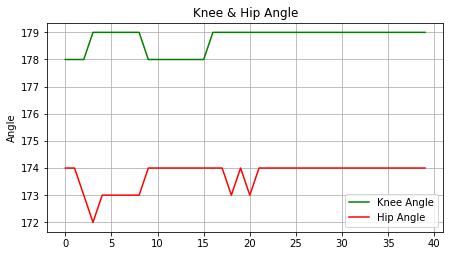

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(322)
#plt.plot(Anglelist)
plt.plot(KneeAnglelist, color='green',label='Knee Angle')
plt.plot(HipAnglelist, color='red', label='Hip Angle')
plt.ylabel('Angle')
#print(Anglelist)
plt.title('Knee & Hip Angle')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()